# Task_1

## Objective:
## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

### About the dataset :
link of the dataset :https://www.kaggle.com/datasets/anxods/world-population-and-forecast-dataset 


For the above task I have taken only the world population data from above repository of data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv(r"D:\edu\PRDG_INFTCH\Data_Science_folder\archive\population\world-population.csv")
df.head() 

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4196 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4196 non-null   object 
 1   Year                           4196 non-null   int64  
 2   Population                     4196 non-null   int64  
 3   Yearly %   Change              4196 non-null   object 
 4   Yearly  Change                 4196 non-null   int64  
 5   Migrants (net)                 3618 non-null   float64
 6   Median Age                     3618 non-null   float64
 7   Fertility Rate                 3618 non-null   float64
 8   Density (P/Km²)                4196 non-null   int64  
 9   Urban  Pop %                   4196 non-null   object 
 10  Urban Population               4196 non-null   object 
 11  Country's Share of  World Pop  4196 non-null   object 
 12  World Population               4196 non-null   i

In [4]:
df.describe()

,Year,Population,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),World Population,Rank
count,4196.000000,4.196000e+03,4.196000e+03,3.618000e+03,3618.000000,3618.000000,4196.000000,4.196000e+03,4196.000000
mean,1993.957340,2.442938e+07,3.297777e+05,-4.818684e+00,25.474986,3.887186,343.500953,5.677487e+09,117.185653
std,21.686153,1.067293e+08,1.334212e+06,1.060564e+05,8.218262,1.985077,1751.259611,1.732760e+09,67.506229
min,1955.000000,6.440000e+02,-6.730240e+05,-1.077397e+06,14.400000,0.850000,0.000000,2.773020e+09,1.000000
25%,1975.000000,2.855070e+05,1.324250e+03,-1.228375e+04,18.500000,2.090000,21.000000,4.079481e+09,59.000000
50%,1995.000000,3.685932e+06,3.892450e+04,-9.000000e+02,22.750000,3.400000,71.000000,5.744213e+09,117.000000
75%,2016.000000,1.305111e+07,2.075432e+05,5.000000e+03,31.600000,5.740000,171.000000,7.464022e+09,175.000000
max,2020.000000,1.439324e+09,2.067648e+07,1.771991e+06,48.400000,8.800000,26150.000000,7.794799e+09,235.000000


In [5]:
df.describe(include="object") 

,country,Yearly % Change,Urban Pop %,Urban Population,Country's Share of World Pop
count,4196,4196,4196,4196,4196
unique,235,742,973,3986,292
top,Afghanistan,0.73 %,N.A.,N.A.,0.00 %
freq,18,24,113,113,543


In [6]:
df.isnull().sum() 

country                            0
Year                               0
Population                         0
Yearly %   Change                  0
Yearly  Change                     0
Migrants (net)                   578
Median Age                       578
Fertility Rate                   578
Density (P/Km²)                    0
Urban  Pop %                       0
Urban Population                   0
Country's Share of  World Pop      0
World Population                   0
Rank                               0
dtype: int64

##### there are many features which need to be converted to numerical datatype like:

- Yearly %   Change
-  Urban  Pop %  
- Urban Population 
- Country's Share of  World Pop

In [7]:
# converting the "Yearly %   Change" to float type after cleaning the data 
df["Yearly %   Change"]=df["Yearly %   Change"].str.strip("%").replace(" ","")
df["Yearly %   Change"]=df["Yearly %   Change"].astype("float64")


In [8]:
df["Urban  Pop %"].unique() 

array(['25.4 %', '25.2 %', '24.9 %', '24.7 %', '24.5 %', '24.3 %',
       '23.4 %', '22.2 %', '21.3 %', '20.4 %', '20.9 %', '18.8 %',
       '15.9 %', '13.5 %', '11.6 %', '9.9 %', '8.4 %', '7.1 %', '63.5 %',
       '62.5 %', '61.4 %', '60.3 %', '59.2 %', '58.1 %', '52.0 %',
       '46.6 %', '41.6 %', '38.8 %', '36.4 %', '35.0 %', '33.7 %',
       '32.7 %', '31.7 %', '31.2 %', '30.7 %', '26.9 %', '72.9 %',
       '72.6 %', '72.2 %', '71.9 %', '71.6 %', '71.1 %', '67.8 %',
       '64.1 %', '60.2 %', '56.3 %', '52.4 %', '48.3 %', '43.8 %',
       '40.6 %', '39.7 %', '37.9 %', '26.3 %', '87.8 %', '87.5 %',
       '87.2 %', '87 %', '86.8 %', '86.9 %', '87.4 %', '88.1 %', '84.8 %',
       '80.4 %', '77.2 %', '73.9 %', '72.1 %', '70.2 %', '53.3 %',
       '65.9 %', '63.9 %', '87.9 %', '88 %', '88.2 %', '88.3 %', '88.8 %',
       '90.3 %', '92.4 %', '93.7 %', '94.7 %', '95.2 %', '92.1 %',
       '87.3 %', '80.2 %', '24.2 %', '58.5 %', '48.6 %', '66.7 %',
       '66.1 %', '65.4 %', '64.8 %', '6

In [9]:
#filtering the data where "Urban  Pop %" is N.A
df[df["Urban  Pop %"]=='N.A.']  

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
106,Anguilla,2019,14869,0.94,138,NaN,NaN,NaN,165,N.A.,N.A.,0.00 %,7713468100,224
107,Anguilla,2018,14731,1.01,147,NaN,NaN,NaN,164,N.A.,N.A.,0.00 %,7631091040,224
108,Anguilla,2017,14584,1.07,155,NaN,NaN,NaN,162,N.A.,N.A.,0.00 %,7547858925,224
109,Anguilla,2016,14429,1.05,150,NaN,NaN,NaN,160,N.A.,N.A.,0 %,7464022049,224
110,Anguilla,2015,14279,1.22,168,NaN,NaN,NaN,159,N.A.,N.A.,0 %,7379797139,224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,Sint Maarten,1970,6864,9.01,481,NaN,NaN,NaN,202,N.A.,N.A.,0 %,3700437046,223
3370,Sint Maarten,1960,2833,6.09,145,NaN,NaN,NaN,83,N.A.,N.A.,0 %,3034949748,231
3371,Sint Maarten,1955,2108,7.06,122,NaN,NaN,NaN,62,N.A.,N.A.,0 %,2773019936,233
4071,Venezuela,2020,28435940,-0.28,-79889,-653249.0,29.6,2.28,32,N.A.,N.A.,0.36 %,7794798739,50


In [10]:
#filtering the data
df=df[~(df["Urban  Pop %"]=='N.A.')]   

In [11]:
# converting the "Yearly %   Change" to float type after cleaning the data 
df["Urban  Pop %"]=df["Urban  Pop %"].str.strip("%").replace(" ","")
df["Urban  Pop %"]=df["Urban  Pop %"].astype("float64")


In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4083 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4083 non-null   object 
 1   Year                           4083 non-null   int64  
 2   Population                     4083 non-null   int64  
 3   Yearly %   Change              4083 non-null   float64
 4   Yearly  Change                 4083 non-null   int64  
 5   Migrants (net)                 3570 non-null   float64
 6   Median Age                     3570 non-null   float64
 7   Fertility Rate                 3570 non-null   float64
 8   Density (P/Km²)                4083 non-null   int64  
 9   Urban  Pop %                   4083 non-null   float64
 10  Urban Population               4083 non-null   object 
 11  Country's Share of  World Pop  4083 non-null   object 
 12  World Population               4083 non-null   int64 

In [13]:
#converting the urban population type to integer
df["Urban Population"]=df["Urban Population"].astype("int64")
df["Urban Population"]

0       9904337
1       9582625
2       9273302
3       8971472
4       8670939
         ...   
4191    1215331
4192     898584
4193     644767
4194     472478
4195     371106
Name: Urban Population, Length: 4083, dtype: int64

In [14]:
df["Country's Share of  World Pop"].unique() 

array(['0.50 %', '0.49 %', '0.48 %', '0.47 %', '0.42 %', '0.39 %',
       '0.34 %', '0.32 %', '0.23 %', '0.25 %', '0.30 %', '0.31 %',
       '0.04 %', '0.05 %', '0.06 %', '0.56 %', '0.55 %', '0.54 %',
       '0.52 %', '0.51 %', '0.46 %', '0.43 %', '0.41 %', '0.38 %',
       '0.36 %', '0.35 %', '0.00 %', '0 %', '0.40 %', '0.27 %', '0.24 %',
       '0.22 %', '0.20 %', '0.19 %', '0.17 %', '0.16 %', '0.18 %',
       '0.58 %', '0.59 %', '0.60 %', '0.61 %', '0.62 %', '0.63 %',
       '0.65 %', '0.66 %', '0.67 %', '0.68 %', '0.07 %', '0.33 %',
       '0.12 %', '0.13 %', '0.14 %', '0.01 %', '0.02 %', '2.11 %',
       '2.12 %', '2.13 %', '2.08 %', '2.00 %', '1.94 %', '1.86 %',
       '1.79 %', '1.72 %', '1.74 %', '1.66 %', '1.58 %', '1.52 %',
       '0.15 %', '0.21 %', '0.28 %', '0.26 %', '0.11 %', '0.10 %',
       '0.09 %', '0.08 %', '0.03 %', '2.73 %', '2.74 %', '2.75 %',
       '2.76 %', '2.77 %', '2.81 %', '2.85 %', '2.82 %', '2.80 %',
       '2.78 %', '2.71 %', '2.63 %', '2.57 %', '2.50 %'

In [15]:
# converting the ""Country's Share of  World Pop"" to float type after cleaning the data 
df["Country's Share of  World Pop"]=df["Country's Share of  World Pop"].str.strip("%").replace(" ","")
df["Country's Share of  World Pop"]=df["Country's Share of  World Pop"].astype("float64")


In [16]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 4083 entries, 0 to 4195
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        4083 non-null   object 
 1   Year                           4083 non-null   int64  
 2   Population                     4083 non-null   int64  
 3   Yearly %   Change              4083 non-null   float64
 4   Yearly  Change                 4083 non-null   int64  
 5   Migrants (net)                 3570 non-null   float64
 6   Median Age                     3570 non-null   float64
 7   Fertility Rate                 3570 non-null   float64
 8   Density (P/Km²)                4083 non-null   int64  
 9   Urban  Pop %                   4083 non-null   float64
 10  Urban Population               4083 non-null   int64  
 11  Country's Share of  World Pop  4083 non-null   float64
 12  World Population               4083 non-null   int64 

#### Making proper column names 

In [17]:
df.columns 

Index(['country', 'Year', 'Population', 'Yearly %   Change', 'Yearly  Change',
       'Migrants (net)', 'Median Age', 'Fertility Rate', 'Density (P/Km²)',
       'Urban  Pop %', 'Urban Population', 'Country's Share of  World Pop',
       'World Population', 'Rank'],
      dtype='object')

In [18]:
df.columns=['Country', 'Year', 'Population', 'Yearly%Change', 'YearlyChange',
       'Migrants(net)', 'MedianAge', 'FertilityRate', 'Density(P/Km²)',
       'UrbanPop%', 'UrbanPopulation', 'WorldPopShare%',
       'WorldPopulation', 'Rank']

In [19]:
df.head() 

,Country,Year,Population,Yearly%Change,YearlyChange,Migrants(net),MedianAge,FertilityRate,Density(P/Km²),UrbanPop%,UrbanPopulation,WorldPopShare%,WorldPopulation,Rank
0,Afghanistan,2020,38928346,2.33,886592,-62920.0,18.4,4.56,60,25.4,9904337,0.50,7794798739,37
1,Afghanistan,2019,38041754,2.34,869833,-62920.0,17.4,5.26,58,25.2,9582625,0.49,7713468100,37
2,Afghanistan,2018,37171921,2.41,875808,-62920.0,17.4,5.26,57,24.9,9273302,0.49,7631091040,38
3,Afghanistan,2017,36296113,2.58,913081,-62920.0,17.4,5.26,56,24.7,8971472,0.48,7547858925,39
4,Afghanistan,2016,35383032,2.82,969429,-62920.0,17.4,5.26,54,24.5,8670939,0.47,7464022049,39


#### DISTRIBUTION OF COUNTRIES 


- Since there are 235 countries so we will ake top 10 and bottom 10 distribution of countries

In [20]:
df["Country"].nunique() 

235

In [21]:
df["Country"].value_counts().nlargest(20)

Country
Afghanistan         18
Montenegro          18
Mozambique          18
Myanmar             18
Namibia             18
Nepal               18
Netherlands         18
New Caledonia       18
New Zealand         18
Nicaragua           18
Niger               18
Nigeria             18
North Korea         18
North Macedonia     18
Norway              18
Oman                18
Pakistan            18
Panama              18
Papua New Guinea    18
Paraguay            18
Name: count, dtype: int64

<Axes: ylabel='Country'>

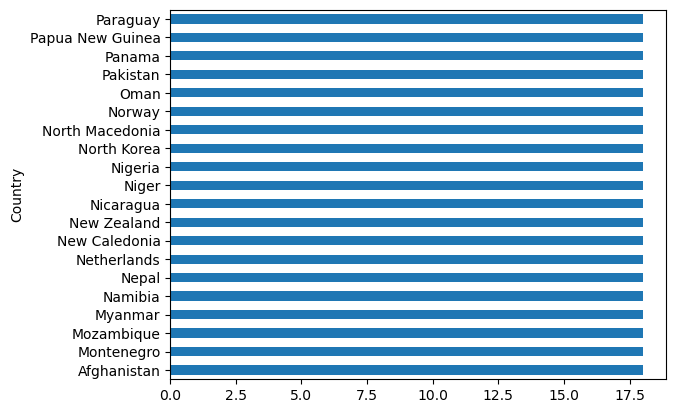

In [22]:
df["Country"].value_counts().nlargest(20).plot(kind="barh")

In [23]:
df["Country"].value_counts().nsmallest(20) 

Country
Holy See                      1
Monaco                        5
Gibraltar                     7
Hong Kong                     7
Singapore                     9
Nauru                         9
Anguilla                     10
Guadeloupe                   10
Kuwait                       10
Puerto Rico                  12
Cayman Islands               13
Sint Maarten                 13
Northern Mariana Islands     14
Macao                        14
Bermuda                      16
Venezuela                    16
Isle Of Man                  17
Turks And Caicos Islands     17
Tokelau                      17
Wallis And Futuna Islands    17
Name: count, dtype: int64

<Axes: ylabel='Country'>

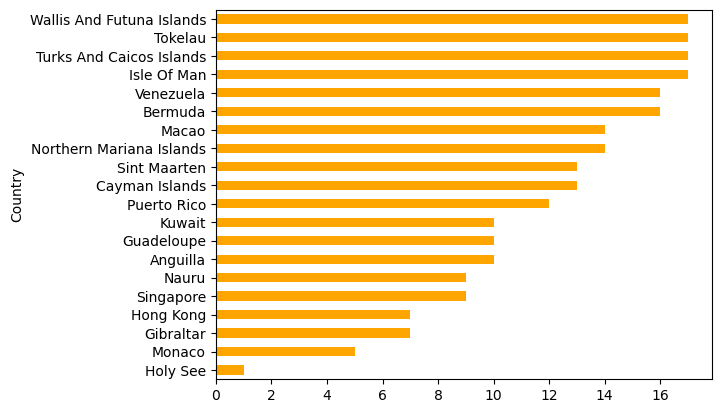

In [24]:
df["Country"].value_counts().nsmallest(20).plot(kind="barh",color="orange") 

#### DISTRIBUTION OF YEARS 

In [25]:
df["Year"].unique() 

array([2020, 2019, 2018, 2017, 2016, 2015, 2010, 2005, 2000, 1995, 1990,
       1985, 1980, 1975, 1970, 1965, 1960, 1955], dtype=int64)

In [26]:
df["Year"].value_counts()  

Year
1965    234
1995    231
1990    231
1975    231
1980    231
1985    231
1960    230
1970    230
1955    230
2000    230
2010    228
2005    227
2015    226
2016    226
2017    226
2018    224
2019    223
2020    194
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Year'>

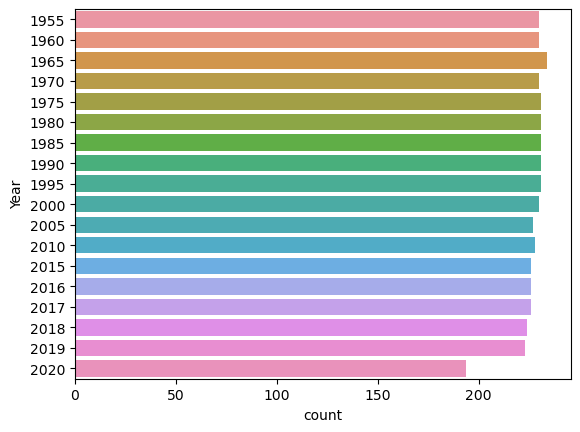

In [27]:
sns.countplot(data=df,y="Year") 

In [28]:
df.columns 

Index(['Country', 'Year', 'Population', 'Yearly%Change', 'YearlyChange',
       'Migrants(net)', 'MedianAge', 'FertilityRate', 'Density(P/Km²)',
       'UrbanPop%', 'UrbanPopulation', 'WorldPopShare%', 'WorldPopulation',
       'Rank'],
      dtype='object')

<Axes: xlabel='Population', ylabel='Count'>

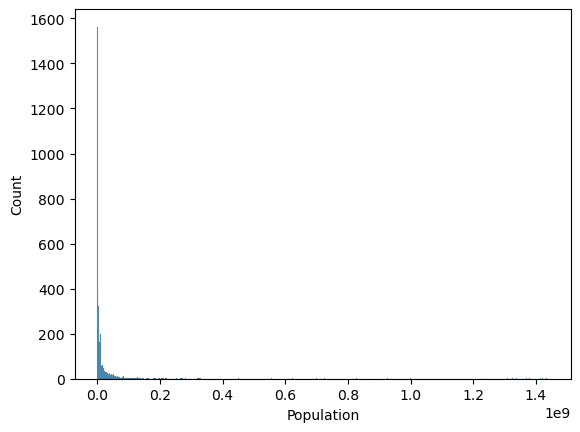

In [29]:
sns.histplot(df["Population"]) 

The histogram in the image displays the distribution of the population values. Here are the key observations:

Skewed Distribution: The data is highly right-skewed. Most of the population values are concentrated near the lower end of the scale (close to 0), with a few extreme values extending far to the right.

Outliers: There are significant outliers or extreme values for population, as indicated by the long tail of the histogram. These could represent highly populous regions (like countries with large populations).

Sparse High Values: The high population counts are rare, as indicated by the thin tail on the right-hand side.

This type of distribution is common for population data across geographic entities like cities or countries, where a few entities (e.g., large countries or metropolitan areas) have very high populations, while the majority have much smaller populations.

<Axes: xlabel='Yearly%Change', ylabel='Count'>

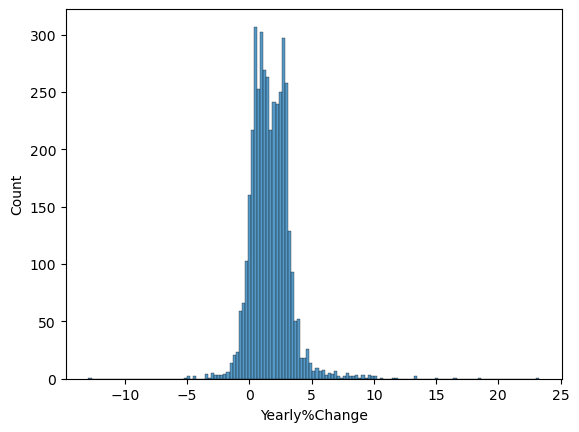

In [30]:
sns.histplot(df['Yearly%Change']) 

The histogram in the image represents the distribution of yearly percentage change values. Here's an explanation of the distribution:

1. **Bell-Shaped Distribution**: The histogram appears to be approximately symmetric and bell-shaped, suggesting that the data follows a normal or near-normal distribution.

2. **Central Tendency**: Most of the data is concentrated around 0%, indicating that the yearly percentage change is generally small or close to no change for the majority of the entities.

3. **Spread**: The majority of values fall between -5% and +5%, showing that changes are generally moderate. The occurrence of larger percentage changes decreases as we move away from the center.

4. **Outliers**: There are a few extreme values, particularly on the right (beyond +10%) and to a lesser extent on the left (below -5%), which may represent cases of rapid growth or significant decline.

This kind of distribution is common in metrics that represent growth or change, as most entities tend to have small or moderate changes, with fewer instances of extreme increases or decreases.

<Axes: xlabel='YearlyChange', ylabel='Count'>

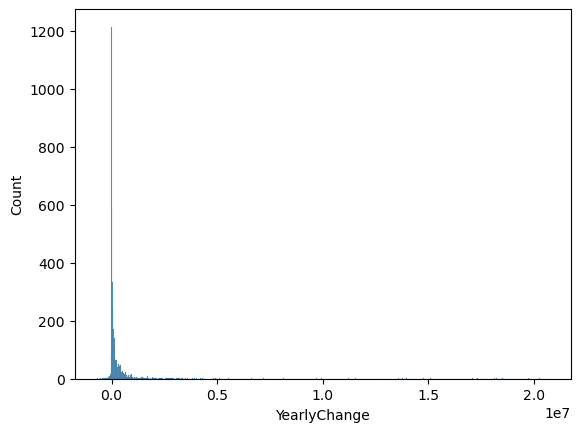

In [31]:
sns.histplot(df['YearlyChange']) 

The histogram represents the distribution of yearly change values, and its characteristics are as follows:

1. **Right-Skewed Distribution**: The distribution is highly skewed to the right. Most of the yearly change values are concentrated near 0, while a few extend far to the right.

2. **Dominance of Small Changes**: The majority of the data points have small yearly changes, indicated by the large spike near 0.

3. **Sparse Large Values**: The long tail on the right suggests that there are fewer instances of large yearly changes, possibly representing exceptional cases of growth.

4. **Outliers**: The extreme values in the tail likely represent significant changes that are rare compared to the typical yearly changes.

This distribution is typical for scenarios where most entities experience incremental yearly changes, but a few entities undergo significant or anomalous changes, such as population increases in rapidly growing regions.

<Axes: xlabel='Migrants(net)', ylabel='Count'>

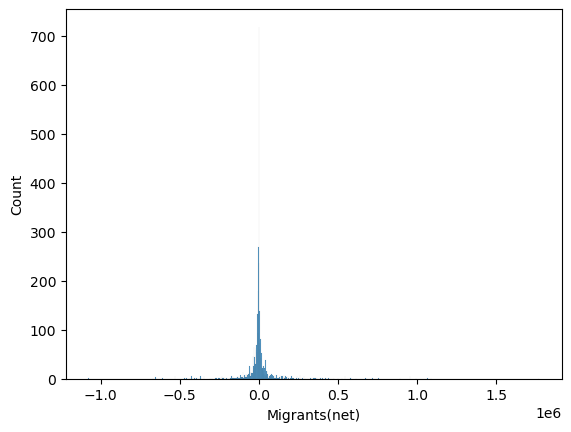

In [32]:
sns.histplot(df['Migrants(net)'])

The histogram in the image represents the distribution of yearly percentage change values. Here's an explanation of the distribution:

1. **Bell-Shaped Distribution**: The histogram appears to be approximately symmetric and bell-shaped, suggesting that the data follows a normal or near-normal distribution.

2. **Central Tendency**: Most of the data is concentrated around 0%, indicating that the migrants influx and efflux is generally small or close to no change for the majority of the entities.

3. **Spread**: The majority of values fall between -0.5% and +0.5%, showing that changes are generally moderate. The occurrence of larger migrantsmovement decreases as we move away from the center.

4. **Outliers**: There are a few extreme values, particularly on the right (beyond +0.5%) and to a lesser extent on the left (below -0.5%), which may represent cases of large influx and efflux.

This kind of distribution is common in metrics that represent movement of people from one location to another.

In [33]:
df.columns

Index(['Country', 'Year', 'Population', 'Yearly%Change', 'YearlyChange',
       'Migrants(net)', 'MedianAge', 'FertilityRate', 'Density(P/Km²)',
       'UrbanPop%', 'UrbanPopulation', 'WorldPopShare%', 'WorldPopulation',
       'Rank'],
      dtype='object')

<Axes: xlabel='MedianAge', ylabel='Density'>

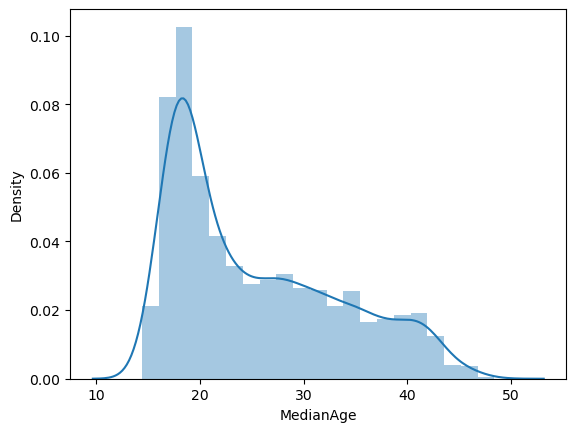

In [34]:
sns.distplot(df["MedianAge"]) 

The histogram represents the distribution of Median Age values, and its characteristics are as follows:

1. **Right-Skewed Distribution**: The distribution is  skewed to the right. Most of the Median Age values are concentrated between 15 to 20, while some extend far to the right.

3. **Sparse Large Values**: The long tail on the right suggests that there are fewer instances of large Median Age, possibly representing exceptional cases of older population.

4. **Outliers**: The extreme values in the tail likely represent significant older median ages that are small in number compared to other .

This distribution represents varying median age across different countries with young population being the top and some countries with people with older median age. 

<Axes: xlabel='FertilityRate', ylabel='Density'>

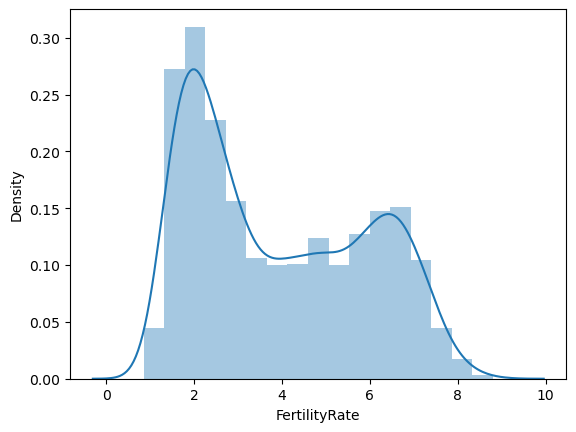

In [35]:
sns.distplot(df['FertilityRate']) 

The graph shows the distribution of fertility rates with a density plot overlaid on a histogram. Here's the explanation:

1. **Bimodal Distribution**: The distribution appears to have two peaks:
   - A higher peak around 2, indicating a concentration of fertility rates in this range.
   - A secondary peak around 6, suggesting another group of regions or countries with higher fertility rates.

2. **Low and High Fertility Groups**: The data indicates two distinct groups:
   - Countries or regions with low fertility rates (below 3).
   - Countries or regions with higher fertility rates (above 5), possibly due to cultural, economic, or developmental factors.

3. **Skewness**: The distribution is slightly skewed to the right, as fertility rates extend up to 10 but taper off gradually.

4. **Central Trend**: Most of the fertility rates are clustered between 1 and 4, which aligns with global trends where many countries have lower fertility rates due to modernization and access to family planning.

This distribution highlights a global divide in fertility rates, where some regions experience higher rates (often developing nations) and others lower rates (often developed nations).

<Axes: xlabel='Density(P/Km²)', ylabel='Count'>

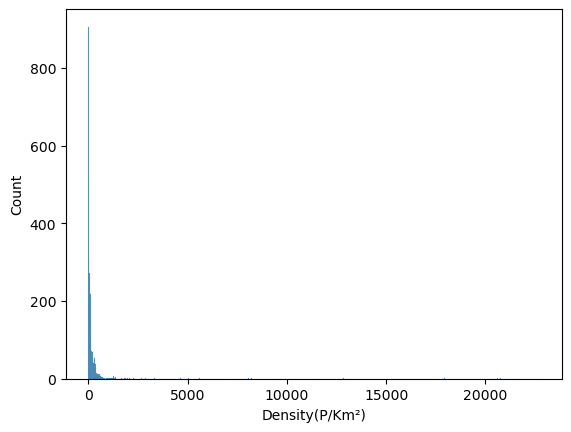

In [36]:
sns.histplot(df['Density(P/Km²)']) 

The histogram represents the distribution of Density values, and its characteristics are as follows:

1. **Right-Skewed Distribution**: The distribution is highly skewed to the right. Most of the density values are concentrated near 0, while a few extend far to the right.

2. **Dominance of Small Changes**: The majority of the data points have small density, indicated by the large spike near 0.

3. **Sparse Large Values**: The long tail on the right suggests that there are fewer instances of large density, possibly representing exceptional cases of population per square km.

4. **Outliers**: The extreme values in the tail likely represent significant density that are rare compared to the typical  small.

This distribution is typical for scenarios where most countries are having very less population density as compared to few countries having higher population density 

<Axes: xlabel='UrbanPop%', ylabel='Density'>

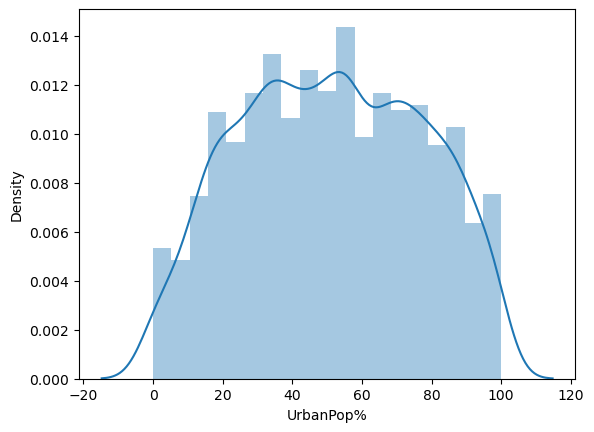

In [37]:
sns.distplot(df['UrbanPop%']) 

<Axes: xlabel='UrbanPopulation', ylabel='Density'>

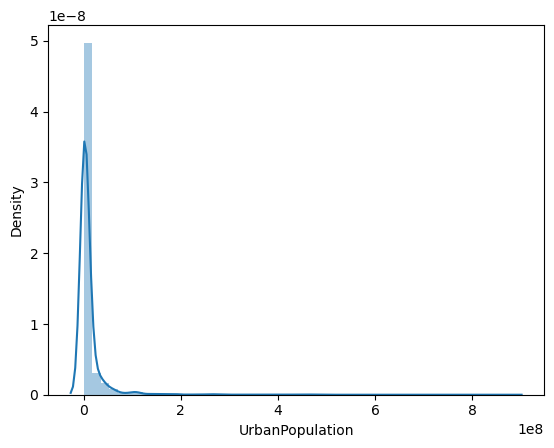

In [38]:
sns.distplot(df['UrbanPopulation']) 

The histogram represents the distribution of population values, and its characteristics are as follows:

1. **Right-Skewed Distribution**: The distribution is highly skewed to the right. Most of the Urban population values are concentrated near 0, while a few extend far to the right.

2. **Dominance of Small Changes**: The majority of the data points have small density, indicated by the large spike near 0.

3. **Sparse Large Values**: The long tail on the right suggests that there are fewer instances of large Urban population.

4. **Outliers**: The extreme values in the tail likely represent significant Urban population that are rare compared to the typical  small.

This distribution is typical for scenarios where most countries are having very less Urban population  as compared to few countries having higher Urban population  

<Axes: xlabel='WorldPopShare%', ylabel='Density'>

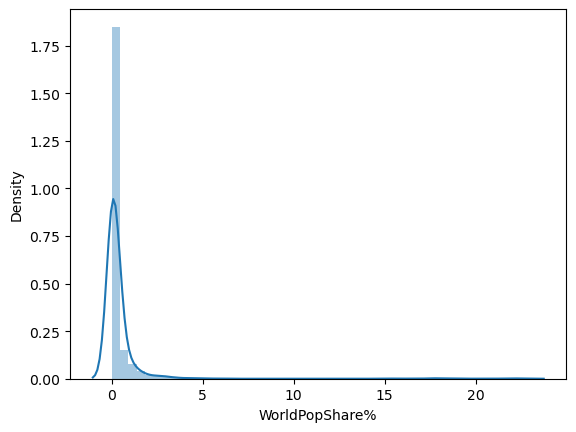

In [40]:
sns.distplot(df['WorldPopShare%']) 



**Observations:**

1. **Shape:** The distribution is highly skewed to the right. This means that there are a few countries with very high WorldPopShare% values, and the majority of countries have much lower values.

2. **Central Tendency:** The peak of the distribution is close to 0. This suggests that most countries have a very small share of the world's population.

3. **Spread:** The distribution is wide, extending from close to 0 to around 20. This indicates a significant variation in the share of the world's population among different countries.



This distribution pattern is indicative of a highly unequal distribution of the world's population. A few countries, likely China and India, have a disproportionately large share of the global population, while most countries have a relatively small share.



**Outliers** The countries with very high WorldPopShare% values can be considered outliers.




<Axes: xlabel='WorldPopulation', ylabel='Density'>

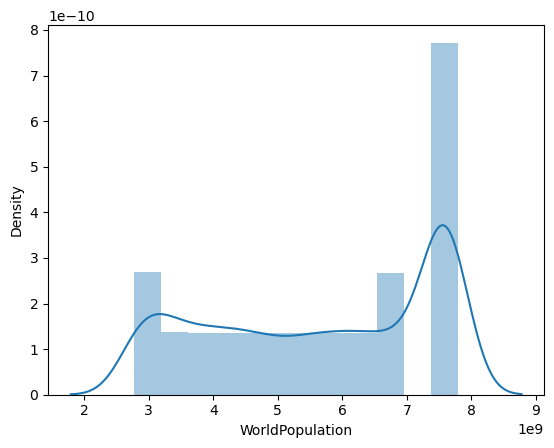

In [41]:
sns.distplot(df['WorldPopulation']) 

The graph represents the distribution of **world population** with a density plot overlaid on a histogram

1. **Bimodal Peaks**:
   - There are two prominent peaks in the distribution:
     - One peak around **2-3 billion**.
     - A much larger peak around **7-8 billion**, representing the current population size.

2. **Dominance of Current Population**:
   - The tall bar and density spike at **7-8 billion** suggest that the majority of data points are concentrated around the modern global population.

3. **Sparse Historical Data**:
   - The smaller density and histogram heights for the **2-3 billion range** indicate past world population sizes. This reflects earlier periods in history when the global population was significantly smaller.

4. **Time Context**:
   - This distribution could reflect world population over time, with a gradual buildup to the current population size and very sparse data for lower historical populations.

Overall, the graph illustrates the rapid increase in world population over time, with a concentration of data in the modern era where the population is at its peak.

<Axes: xlabel='Rank', ylabel='Density'>

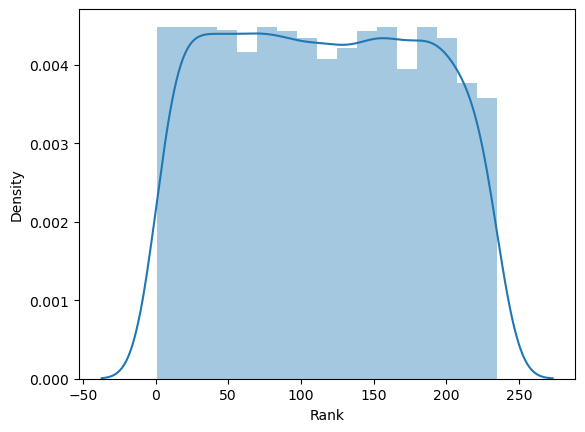

In [42]:
sns.distplot(df['Rank'])  



**Observations:**

1. **Shape:** The distribution appears to be roughly bell-shaped or normal. This indicates that most countries tend to have ranks around the center of the distribution, with fewer countries having very low or very high ranks.

2. **Central Tendency:** The peak of the distribution seems to be around the 50-100 rank range. This suggests that the majority of countries are clustered in this middle range of rankings.

3. **Spread:** The distribution is relatively wide, extending from around -50 to 250. This indicates that there is a fair amount of variation in the ranks of countries.

**Interpretation:**

The graph suggests that the ranks of countries are not uniformly distributed. Instead, they follow a pattern where most countries are ranked in the middle range, with fewer countries at the extremes. This pattern is consistent with what we might expect in various rankings, where a large number of countries tend to cluster in the middle, while a few countries excel or underperform.



**Additional Considerations:**

* **Outliers:** While the graph doesn't show any extreme outliers, it's possible that a few countries with very high or low ranks may be present but not visible due to the scale of the graph.


 
